# 1 线性回归之正规方程

特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5559

模型回归系数:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
截距: -37.0233


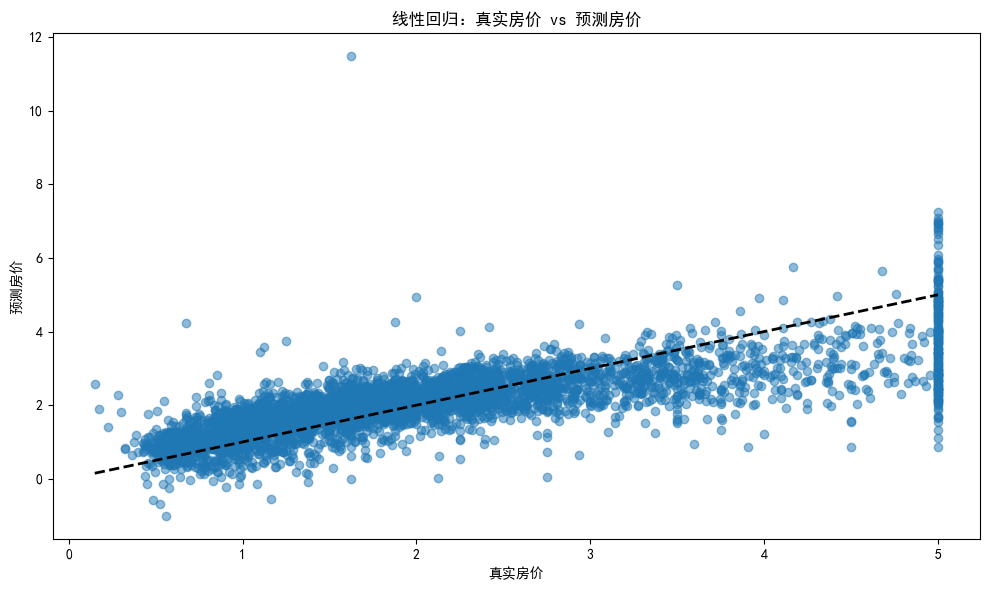

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target


# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")



# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")


# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])
# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train, y_train)

# 预测
y_pred = lr_model.predict(X_test)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)


print(f"均方误差 (MSE): {mse:.4f}")


# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lr_model.intercept_:.4f}")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('线性回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()


特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5559

模型回归系数:
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698
截距: 2.0719

模型和标准化器已保存


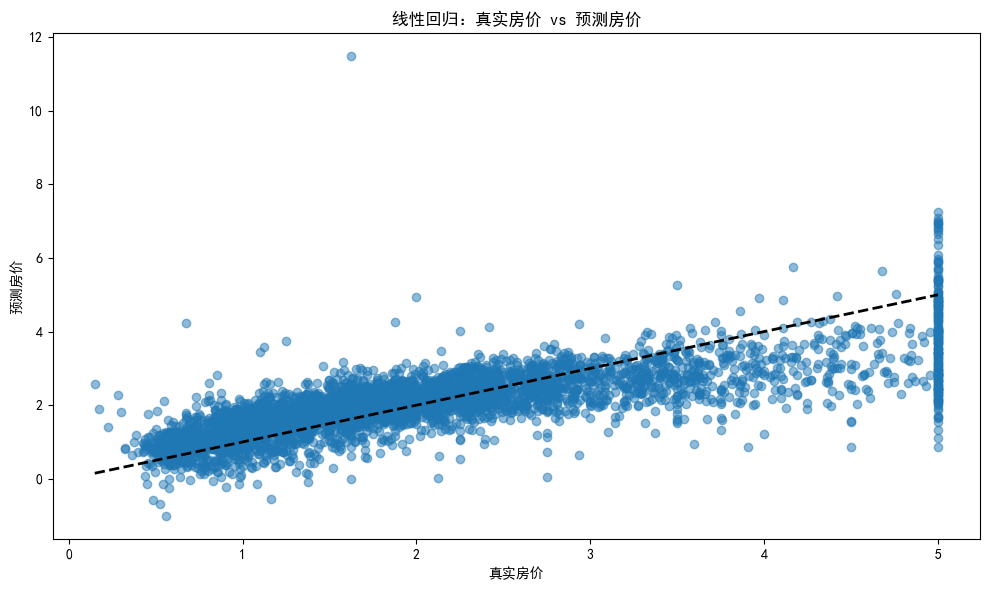

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])

# 对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train_scaled, y_train)

# 预测
y_pred = lr_model.predict(X_test_scaled)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")

# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lr_model.intercept_:.4f}")

# 保存模型和标准化器
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n模型和标准化器已保存")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('线性回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()
